In [ ]:
!pip install fracdiff

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader
import seaborn
import statsmodels.tsa.stattools as stattools
from fracdiff import Fracdiff, FracdiffStat, fdiff
from fracdiff.sklearn import FracdiffStat
from pandas.plotting import register_matplotlib_converters

In [ ]:
df_sa = pd.read_excel("IS-data(3).xlsx",parse_dates=['Date '], index_col='Date ')

Interest Rate

In [ ]:
df_SAIN = df_sa['Interest Rate ']
df_SAIN.head()

Date 
1992-01-01    4.5
1992-02-01    4.5
1992-03-01    4.5
1992-04-01    4.5
1992-05-01    4.0
Name: Interest Rate , dtype: float64

Text(0.5, 1.0, 'Interest Rate')

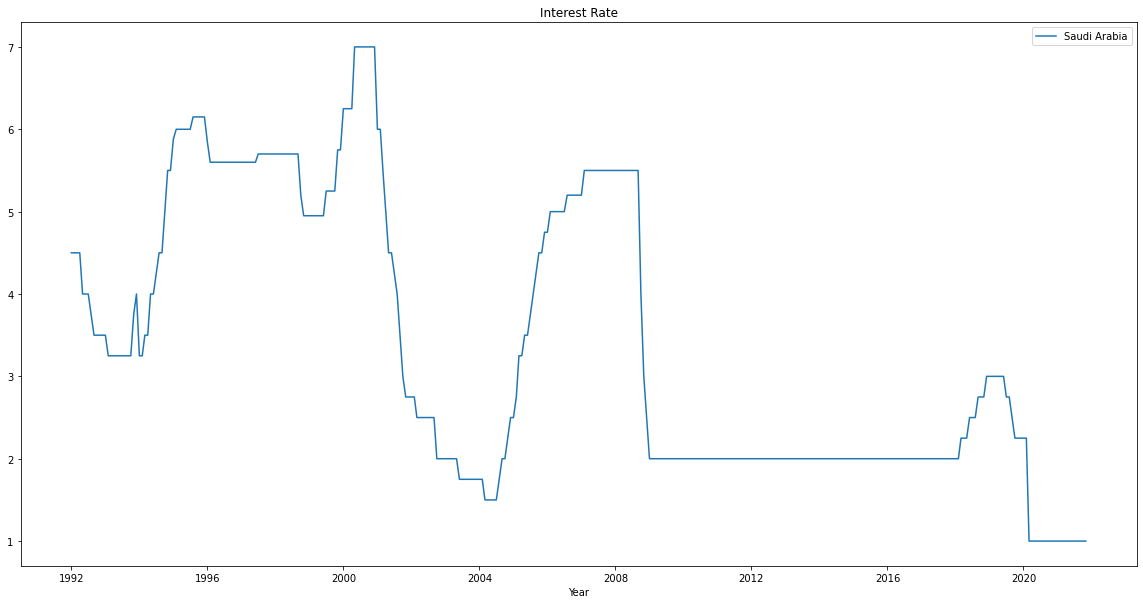

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_SAIN, label = 'Saudi Arabia')
ax.set_xlabel('Year')
ax.legend()
plt.title("Interest Rate")

In [ ]:
X = df_SAIN.values.reshape(-1, 1)

fs = FracdiffStat(mode="valid")

Xdiff = fs.fit_transform(X)
_, pvalue, _, _, _, _ = stattools.adfuller(Xdiff.reshape(-1))
corr = np.corrcoef(X[-Xdiff.size :, 0], Xdiff.reshape(-1))[0][1]

print("* Order: {:.2f}".format(fs.d_[0]))
print("* ADF p-value: {:.2f} %".format(100 * pvalue))
print("* Correlation with the original time-series: {:.2f}".format(corr))

* Order: 0.45
* ADF p-value: 4.42 %
* Correlation with the original time-series: 0.90


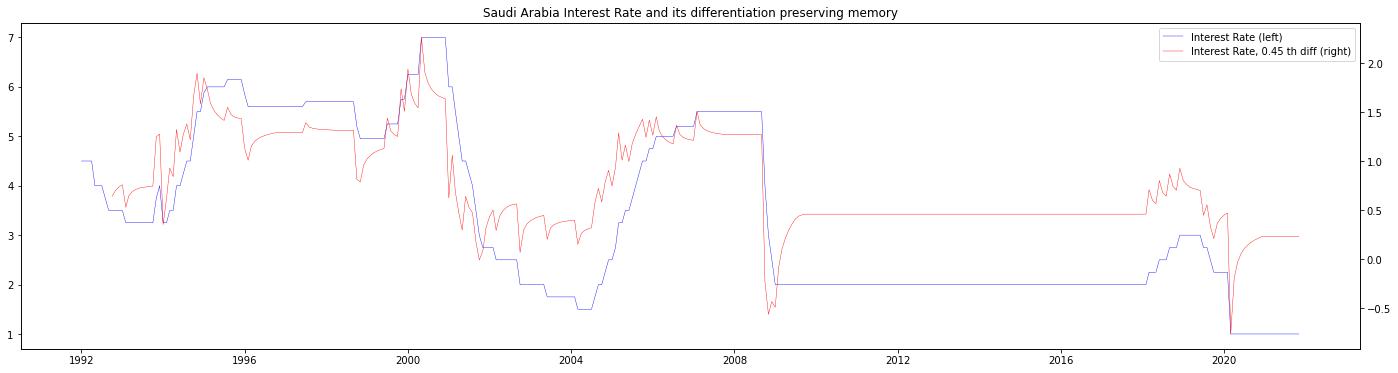

In [ ]:
df_SAIN_diff = pd.Series(Xdiff.reshape(-1), index=df_SAIN.index[-Xdiff.size :])

fig, ax_s = plt.subplots(figsize=(24, 6))
plt.title("Saudi Arabia Interest Rate and its differentiation preserving memory")
ax_d = ax_s.twinx()

plot_s = ax_s.plot(df_SAIN, color="blue", linewidth=0.4, label="Interest Rate (left)")
plot_d = ax_d.plot(
    df_SAIN_diff,
    color="red",
    linewidth=0.4,
    label=f"Interest Rate, {fs.d_[0]:.2f} th diff (right)",
)
plots = plot_s + plot_d

ax_s.legend(plots, [p.get_label() for p in plots], loc=0)
plt.show()

Exchange Rate

In [ ]:
df_SAEXCH = df_sa['Exchange Rate(Riyals to Dollars) ']
df_SAEXCH.head()

Date 
1992-01-01    3.7507
1992-02-01    3.7500
1992-03-01    3.7547
1992-04-01    3.7500
1992-05-01    3.7547
Name: Exchange Rate(Riyals to Dollars) , dtype: float64

Text(0.5, 1.0, 'Exchange Rate')

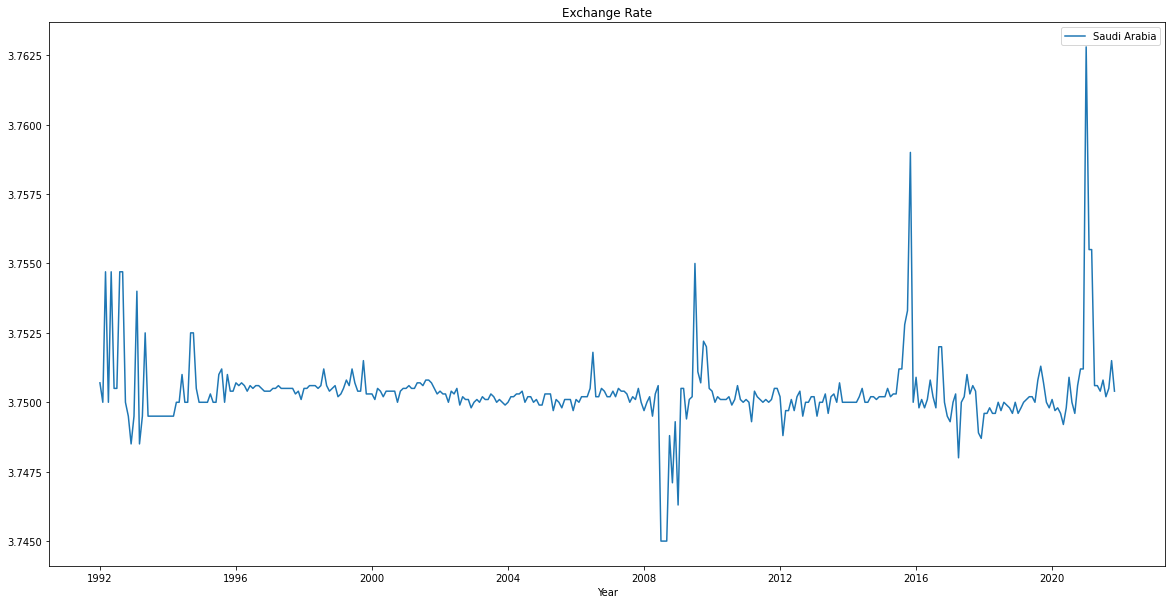

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_SAEXCH, label = 'Saudi Arabia')
ax.set_xlabel('Year')
ax.legend()
plt.title("Exchange Rate")

In [ ]:
X = df_SAEXCH.values.reshape(-1, 1)

fs = FracdiffStat(mode="valid")

Xdiff = fs.fit_transform(X)
_, pvalue, _, _, _, _ = stattools.adfuller(Xdiff.reshape(-1))
corr = np.corrcoef(X[-Xdiff.size :, 0], Xdiff.reshape(-1))[0][1]

print("* Order: {:.2f}".format(fs.d_[0]))
print("* ADF p-value: {:.2f} %".format(100 * pvalue))
print("* Correlation with the original time-series: {:.2f}".format(corr))

* Order: 0.00
* ADF p-value: 0.00 %
* Correlation with the original time-series: 1.00


Oil Prices

In [ ]:
df_sa.head()

,Interest Rate,Exchange Rate(Riyals to Dollars),Oil Prices
Date,,,
1992-01-01,4.5,3.7507,18.76
1992-02-01,4.5,3.7500,18.99
1992-03-01,4.5,3.7547,18.92
1992-04-01,4.5,3.7500,20.23
1992-05-01,4.0,3.7547,20.97


In [ ]:
df_SAOIL = df_sa['Oil Prices']
df_SAOIL.head()

Date 
1992-01-01    18.76
1992-02-01    18.99
1992-03-01    18.92
1992-04-01    20.23
1992-05-01    20.97
Name: Oil Prices, dtype: float64

In [ ]:
X = df_SAOIL.values.reshape(-1, 1)

fs = FracdiffStat(mode="valid")

Xdiff = fs.fit_transform(X)
_, pvalue, _, _, _, _ = stattools.adfuller(Xdiff.reshape(-1))
corr = np.corrcoef(X[-Xdiff.size :, 0], Xdiff.reshape(-1))[0][1]

print("* Order: {:.2f}".format(fs.d_[0]))
print("* ADF p-value: {:.2f} %".format(100 * pvalue))
print("* Correlation with the original time-series: {:.2f}".format(corr))

* Order: 0.12
* ADF p-value: 4.83 %
* Correlation with the original time-series: 0.99


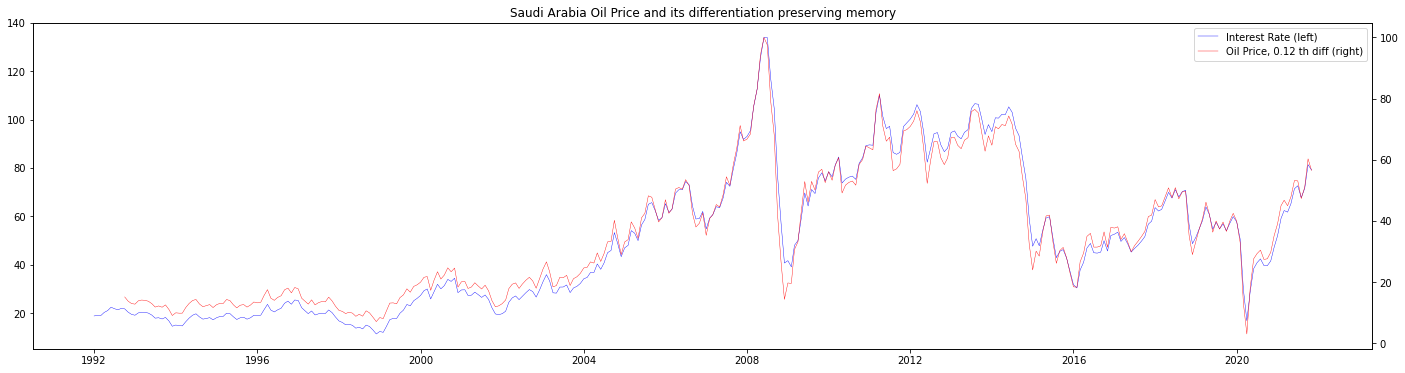

In [ ]:
df_SAOIL_diff = pd.Series(Xdiff.reshape(-1), index=df_SAOIL.index[-Xdiff.size :])

fig, ax_s = plt.subplots(figsize=(24, 6))
plt.title("Saudi Arabia Oil Price and its differentiation preserving memory")
ax_d = ax_s.twinx()

plot_s = ax_s.plot(df_SAOIL, color="blue", linewidth=0.4, label="Interest Rate (left)")
plot_d = ax_d.plot(
    df_SAOIL_diff,
    color="red",
    linewidth=0.4,
    label=f"Oil Price, {fs.d_[0]:.2f} th diff (right)",
)
plots = plot_s + plot_d

ax_s.legend(plots, [p.get_label() for p in plots], loc=0)
plt.show()

Merging the datasets

In [ ]:
df_sa_diff = pd.concat([df_SAIN_diff, df_SAOIL_diff], axis=1)
df_sa_diff

,0,1
Date,,
1992-10-01,0.645721,15.140596
1992-11-01,0.703629,13.748469
1992-12-01,0.738602,12.977314
1993-01-01,0.763258,12.776940
1993-02-01,0.532058,13.884177
...,...,...
2021-07-01,0.231291,53.062728
2021-08-01,0.231291,47.299584
2021-09-01,0.231291,51.037478


In [ ]:
df_sa_diff.columns =['Interest Rate', 'Oil Prices']

In [ ]:
df_sa_diff = pd.concat([df_sa_diff, df_SAEXCH], axis=1)

In [ ]:
df_sa_diff

,Interest Rate,Oil Prices,Exchange Rate(Riyals to Dollars)
Date,,,
1992-01-01,NaN,NaN,3.7507
1992-02-01,NaN,NaN,3.7500
1992-03-01,NaN,NaN,3.7547
1992-04-01,NaN,NaN,3.7500
1992-05-01,NaN,NaN,3.7547
...,...,...,...
2021-07-01,0.231291,53.062728,3.7508
2021-08-01,0.231291,47.299584,3.7502
2021-09-01,0.231291,51.037478,3.7505


In [ ]:
df_sa_diff.dropna(subset = ["Interest Rate", "Oil Prices"], inplace=True)
df_sa_diff

,Interest Rate,Oil Prices,Exchange Rate(Riyals to Dollars)
Date,,,
1992-10-01,0.645721,15.140596,3.7500
1992-11-01,0.703629,13.748469,3.7495
1992-12-01,0.738602,12.977314,3.7485
1993-01-01,0.763258,12.776940,3.7495
1993-02-01,0.532058,13.884177,3.7540
...,...,...,...
2021-07-01,0.231291,53.062728,3.7508
2021-08-01,0.231291,47.299584,3.7502
2021-09-01,0.231291,51.037478,3.7505


In [ ]:
df_sa_diff.columns =['Interest Rate', 'Oil Prices', 'Exchange rate']
df_sa_diff

,Interest Rate,Oil Prices,Exchange rate
Date,,,
1992-10-01,0.645721,15.140596,3.7500
1992-11-01,0.703629,13.748469,3.7495
1992-12-01,0.738602,12.977314,3.7485
1993-01-01,0.763258,12.776940,3.7495
1993-02-01,0.532058,13.884177,3.7540
...,...,...,...
2021-07-01,0.231291,53.062728,3.7508
2021-08-01,0.231291,47.299584,3.7502
2021-09-01,0.231291,51.037478,3.7505


VAR modelling

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

model = VAR(df_sa_diff)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -13.932080214786806
BIC :  -13.79952759855062
FPE :  8.899707825180952e-07
HQIC:  -13.879314029282938 

Lag Order = 2
AIC :  -14.108414204865037
BIC :  -13.875953710395889
FPE :  7.461061732623017e-07
HQIC:  -14.015867194889136 

Lag Order = 3
AIC :  -14.099083641547056
BIC :  -13.766288991983927
FPE :  7.531241491032568e-07
HQIC:  -13.966577664771702 

Lag Order = 4
AIC :  -14.064315780262753
BIC :  -13.630757652438326
FPE :  7.798146211118834e-07
HQIC:  -13.891671409976263 

Lag Order = 5
AIC :  -14.068896885434452
BIC :  -13.53414287958661
FPE :  7.76323026360269e-07
HQIC:  -13.855933397862199 

Lag Order = 6
AIC :  -14.058610448273498
BIC :  -13.42222505737151
FPE :  7.844579703365241e-07
HQIC:  -13.80514580974082 

Lag Order = 7
AIC :  -14.056111930719066
BIC :  -13.317656509398507
FPE :  7.865709651171978e-07
HQIC:  -13.761962784653402 

Lag Order = 8
AIC :  -14.044937532719876
BIC :  -13.203970265820182
FPE :  7.956123227862216e-07
HQIC:  -13.709919186489675

In [ ]:
x = model.select_order(maxlags=16)
x.summary()

,AIC,BIC,FPE,HQIC
0,-8.794,-8.760,0.0001516,-8.781
1,-14.02,-13.88,8.179e-07,-13.96
2,-14.22*,-13.98*,6.703e-07*,-14.12*
3,-14.21,-13.86,6.765e-07,-14.07
4,-14.19,-13.74,6.903e-07,-14.01
5,-14.15,-13.61,7.126e-07,-13.94
6,-14.13,-13.48,7.329e-07,-13.87
7,-14.13,-13.38,7.288e-07,-13.83
8,-14.10,-13.24,7.528e-07,-13.76
9,-14.06,-13.10,7.852e-07,-13.68


In [ ]:
results = VAR(df_sa_diff).fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 09, Mar, 2022
Time:                     04:09:09
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -13.8760
Nobs:                     348.000    HQIC:                  -14.0159
Log likelihood:           994.492    FPE:                7.46106e-07
AIC:                     -14.1084    Det(Omega_mle):     7.02835e-07
--------------------------------------------------------------------
Results for equation Interest Rate
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                  -58.600726        34.525095           -1.697           0.090
L1.Interest Rate         0.738869         0.053903           13.707           0.000
L1.Oil Prices            0.004821       

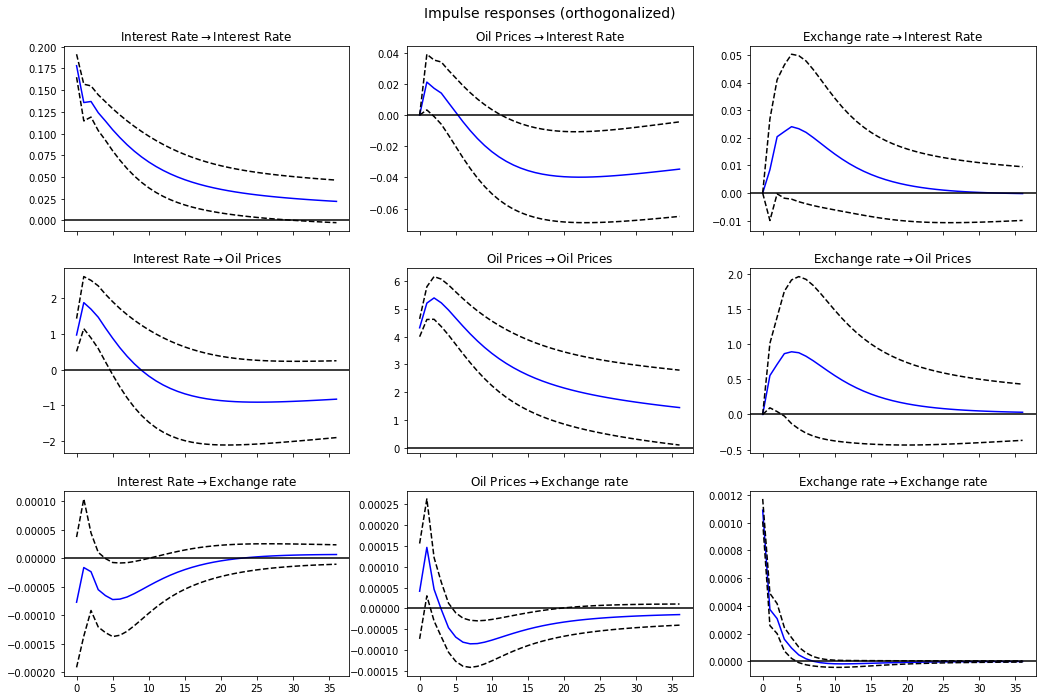

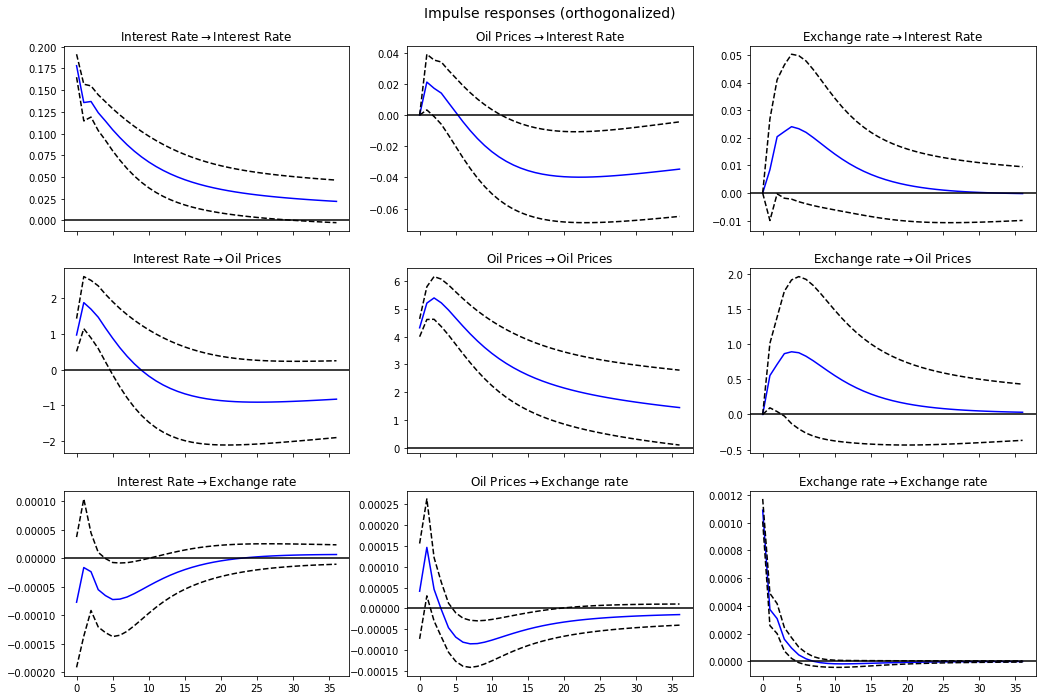

In [ ]:
irf = results.irf(36)
irf.plot(orth=True,figsize=(15, 10))

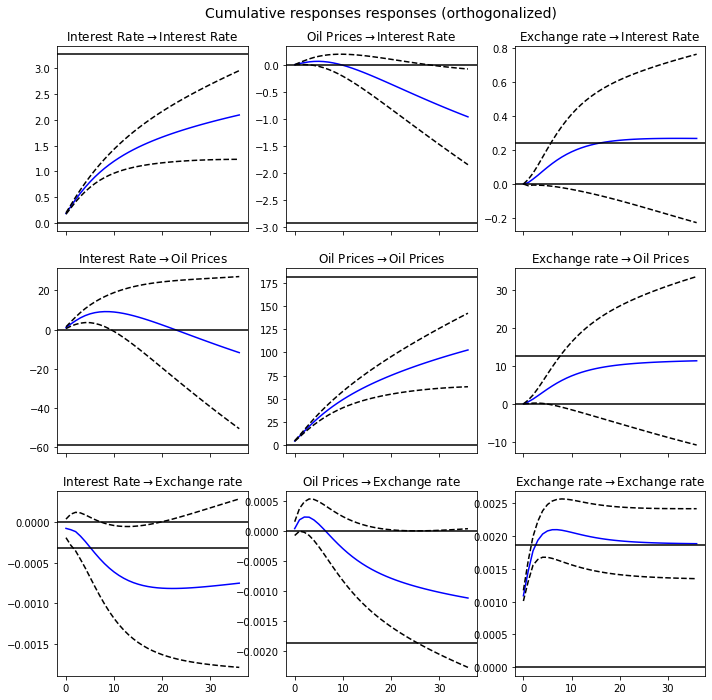

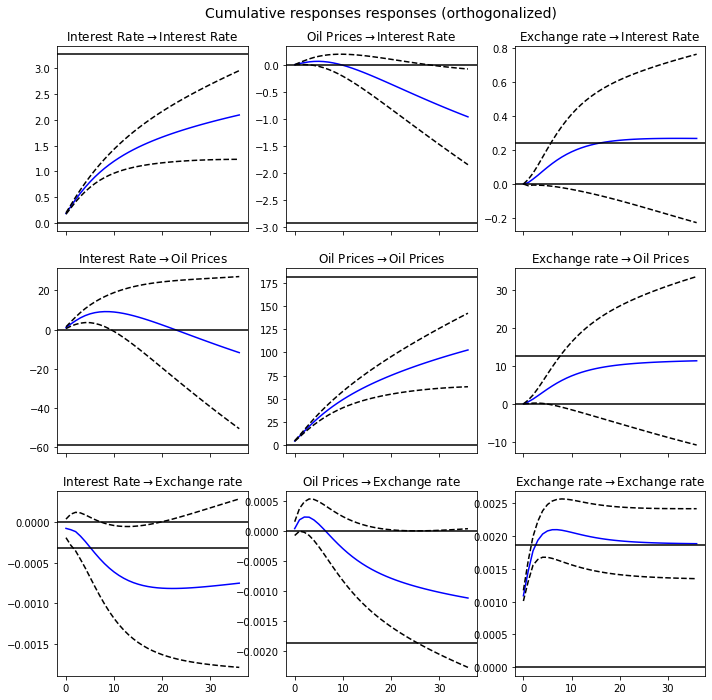

In [ ]:
irf.plot_cum_effects(orth=True)